Dissipative atom-cavity

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, brmesolve, destroy, identity, ket2dm, mesolve,
                   plot_energy_levels, plot_expectation_values, tensor)

%matplotlib inline

In [4]:
N = 10 # num cavity modes

# operators
a = tensor(destroy(N), identity(2))
sm = tensor(identity(N), destroy(2))

# expectation operators
e_ops = [a.dag() * a, sm.dag()*sm]

# initial state
psi0 = ket2dm(tensor(basis(N, 1), basis(2, 0)))

define dissipation to the environment

In [5]:
w0 = 1.0 * 2 * np.pi
g_weak = 0.1 * 2 * np.pi
g_strong = 0.75 * 2 * np.pi
kappa = 0.05

# collapse operators (for mesolve)
c_ops = [np.sqrt(kappa) * a]
# noise power spectrum (for brmesolve)
a_ops = [[(a + a.dag()), lambda w: kappa * (w > 0)]]

# Hamiltonians
H_no = w0 * a.dag() * a + w0 * sm.dag() * sm
H_weak = w0 * a.dag() * a + w0 * sm.dag() * sm + \
         g_weak * (a + a.dag()) * (sm + sm.dag())
H_strong = w0 * a.dag() * a + w0 * sm.dag() * sm + \
           g_strong * (a + a.dag()) * (sm + sm.dag())

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\solver\brmesolve.py:173: FutureWarning: c_ops, e_ops, args and options will be keyword only from qutip 5.3
  warnings.warn(


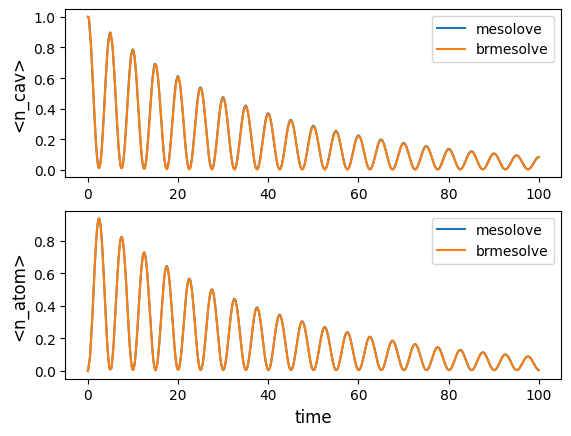

In [6]:
# times for simulation
times = np.linspace(0, 10 * 2 * np.pi / g_weak, 1000)
# simulation
result_me_weak = mesolve(H_weak, psi0, times, c_ops, e_ops)
result_brme_weak = brmesolve(H_weak, psi0, times, a_ops, e_ops)
fig, axes = plot_expectation_values(
    [result_me_weak, result_brme_weak], ylabels=["<n_cav>", "<n_atom>"]
)
for ax in axes:
    ax.legend(['mesolove', 'brmesolve'], loc='upper right')

Strong coupling

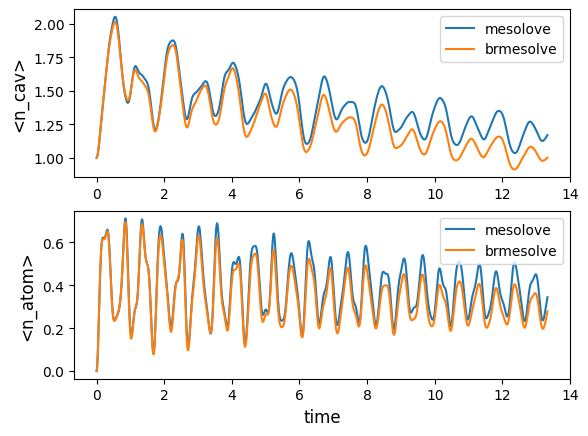

In [7]:
# times for simulation
times = np.linspace(0, 10 * 2 * np.pi / g_strong, 1000)
# simulation
result_me_strong = mesolve(H_strong, psi0, times, c_ops, e_ops)
result_brme_strong = brmesolve(H_strong, psi0, times, a_ops, e_ops)
fig, axes = plot_expectation_values(
    [result_me_strong, result_brme_strong], ylabels=["<n_cav>", "<n_atom>"]
)
for ax in axes:
    ax.legend(['mesolove', 'brmesolve'], loc='upper right')

differences in solution between weak and strong due to the eigenstates of the system with strong coupling have contributions from the atom and cavity system. The Lindbladian master equation solver assumes the dissipation of the atom subsystem is unaffected by the dissipation of the cavity subsystem.

dissipation leads to transitions between eigenstates of coupled system

For weak coupling, energy levels split by a small amount
For strong coupling, the energy levels from different states bunch together and show mixing of atom and cavity 

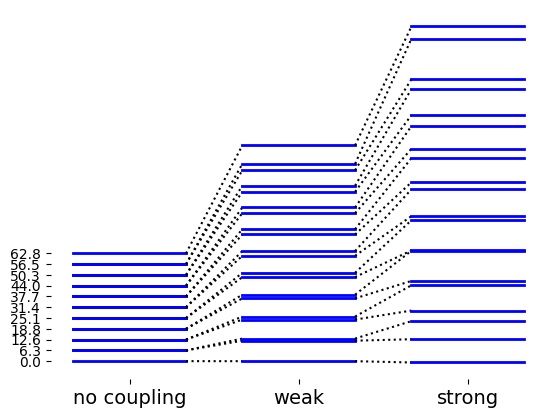

In [8]:
plot_energy_levels([H_no, H_weak, H_strong],
                   h_labels=["no coupling", "weak", "strong"]);

`qutip.brmesolve` uses the secular approximation - assumes fast-oscillating terms can be neglected

- can be deactivated by setting `sec_cutoff=-1`
- useful in some sims

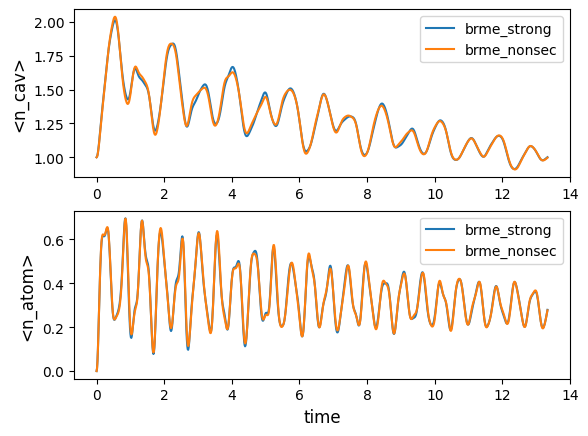

In [9]:
result_brme_nonsec = brmesolve(H_strong, psi0, times, a_ops,
                               sec_cutoff=-1, e_ops=e_ops)
fig, axes = plot_expectation_values(
    [result_brme_strong, result_brme_nonsec], ylabels=["<n_cav>", "<n_atom>"]
)
# plot_expectation_values uses the number operator
for ax in axes:
    ax.legend(['brme_strong', 'brme_nonsec'], loc='upper right')

- Lindbladian master equation solver guarantees trace is preserved
- b-r solver doesn't guarantee this
- 


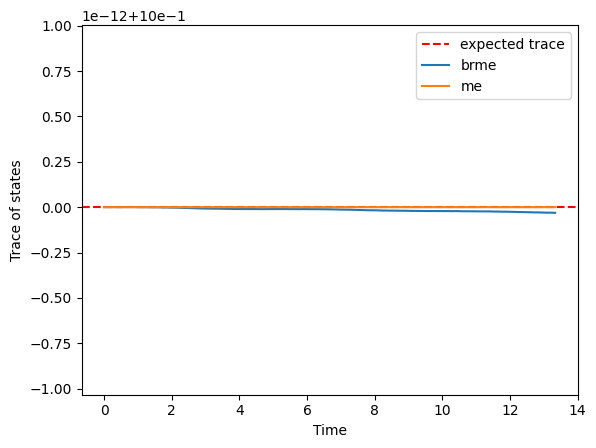

In [10]:
# calculate states for weak coupling
me_states = mesolve(H_weak, psi0, times, c_ops, e_ops=[])
brme_states = brmesolve(H_weak, psi0, times, a_ops, e_ops=[])
# plot the traces and expected trace
plt.axhline(1.0, label="expected trace", c="red", linestyle="--")
plt.plot(times, [state.tr() for state in brme_states.states], label="brme")
plt.plot(times, [state.tr() for state in me_states.states], label="me")
plt.legend(), plt.xlabel("Time"), plt.ylabel("Trace of states");